/tmp/ipykernel_211725/2437772528.py:15: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.



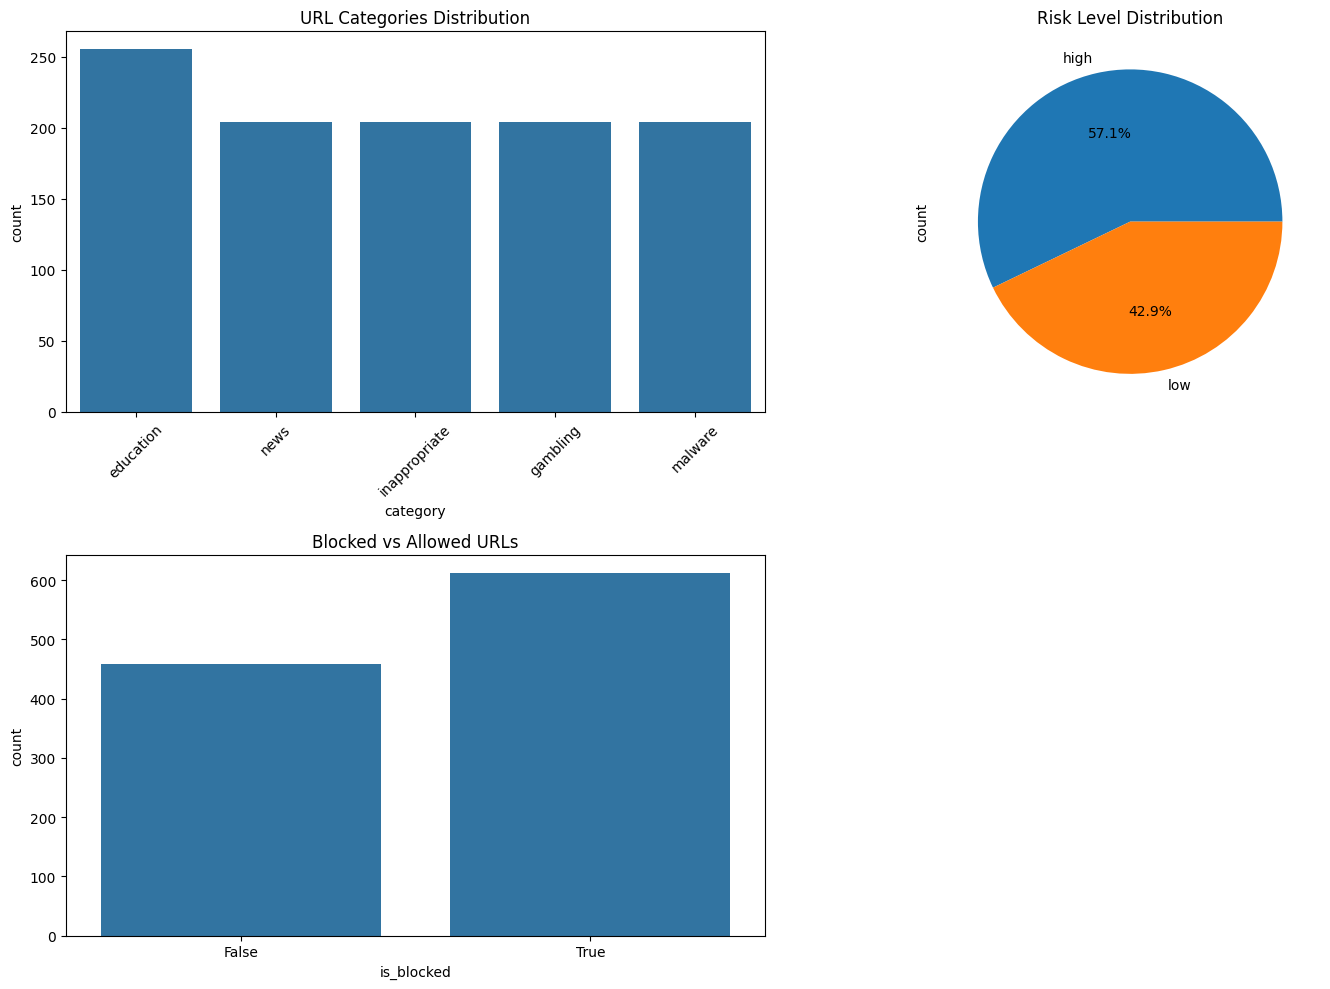

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from training import URLClassifier
import plotly.express as px
import plotly.graph_objects as go

def visualize_results():
    # Load data
    df = pd.read_csv('url_dataset.csv')
    
    # Load model
    model = URLClassifier()
    model.load_state_dict(torch.load('url_classifier_final.pth'))
    model.eval()

    # Create visualizations
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Category Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(data=df, x='category')
    plt.xticks(rotation=45)
    plt.title('URL Categories Distribution')

    # 2. Risk Level Distribution
    plt.subplot(2, 2, 2)
    df['risk_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Risk Level Distribution')

    # 3. Blocked vs Allowed URLs
    plt.subplot(2, 2, 3)
    sns.countplot(data=df, x='is_blocked')
    plt.title('Blocked vs Allowed URLs')

    # Save plots
    plt.tight_layout()
    plt.savefig('url_analysis.png')

    # Interactive Plotly visualization
    fig = go.Figure()
    
    categories = df['category'].unique()
    for category in categories:
        cat_data = df[df['category'] == category]
        fig.add_trace(go.Box(
            y=cat_data['is_blocked'],
            name=category,
            boxpoints='all'
        ))
    
    fig.update_layout(
        title='URL Classification by Category',
        yaxis_title='Blocking Probability',
        boxmode='group'
    )
    fig.write_html('url_analysis.html')

if __name__ == "__main__":
    visualize_results()